# House Rent Prediction - KNN

## Imports

In [69]:
# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Scipy
from scipy.stats import boxcox

# Dataset
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("iamsouravbanerjee/house-rent-prediction-dataset")
dataset = pd.read_csv(f"{path}\\House_Rent_Dataset.csv")

## Análise Exploratório de Dados

In [70]:
dataset.shape

(4746, 12)

In [71]:
print("Number of row: ", dataset.shape[0])
print("Number of columns: ", dataset.shape[1])

Number of row:  4746
Number of columns:  12


In [72]:
# Checking for missing values
dataset.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [73]:
dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

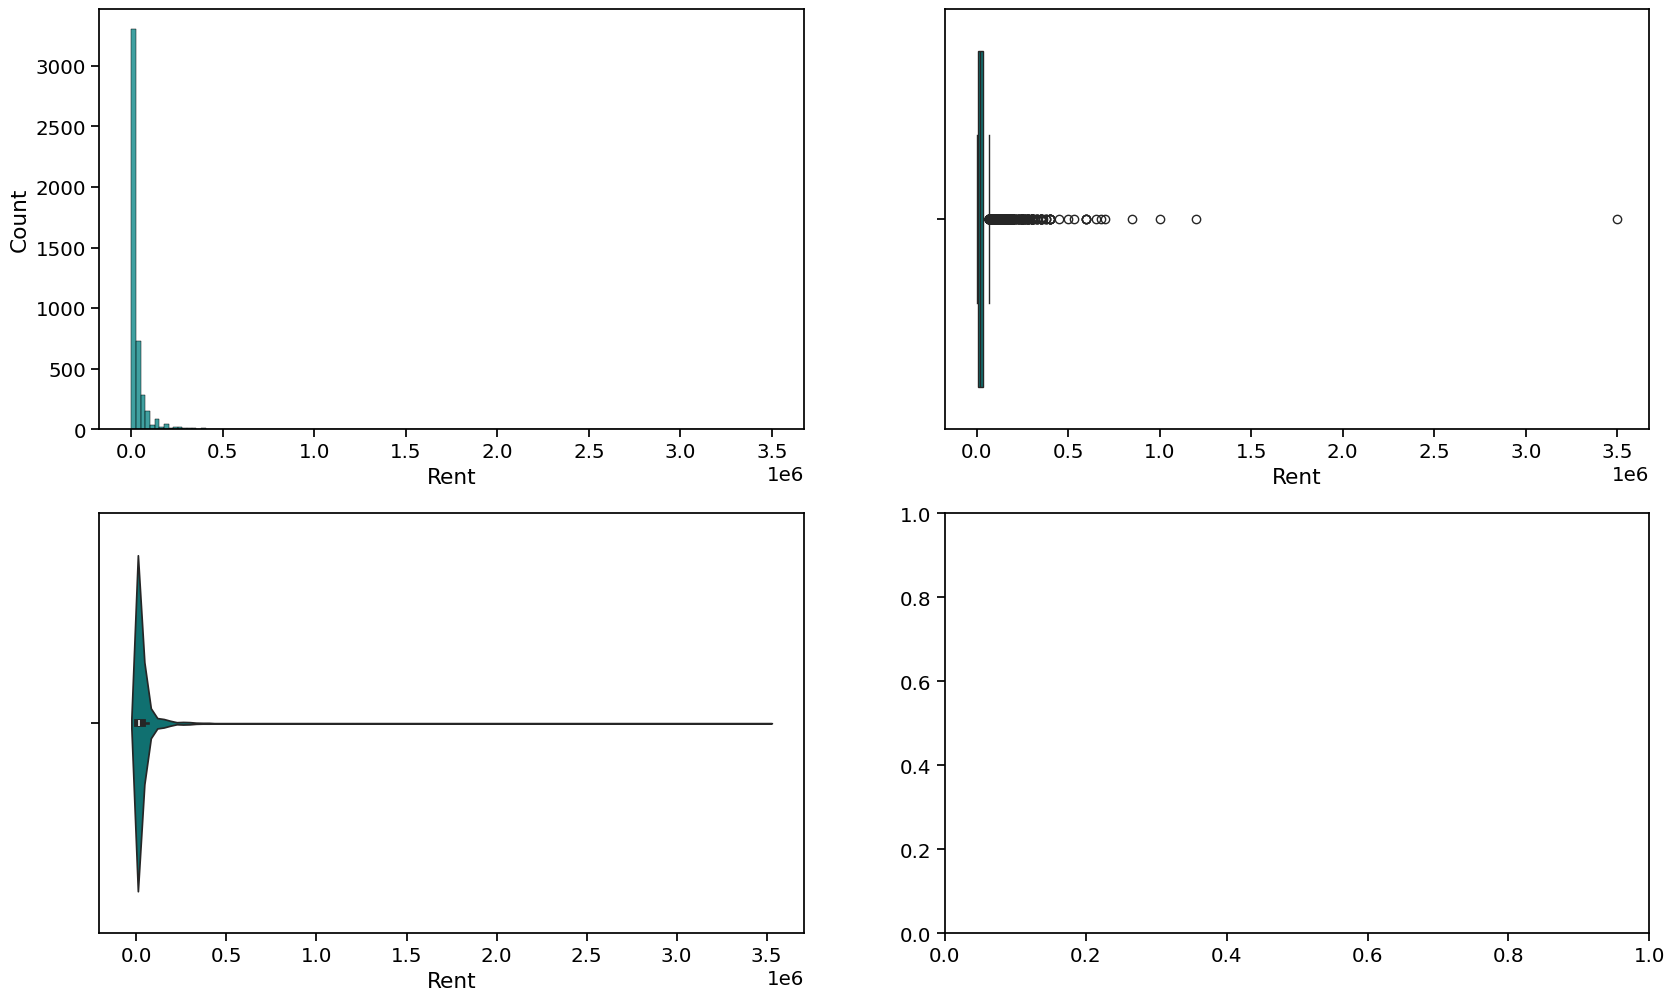

In [74]:
# Rent - Our target column

fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = dataset['Rent'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = dataset['Rent'], ax= ax[0, 1], color= 'teal') # entender bem como funciona esse para a gent explicar
ax3 = sns.violinplot(x = dataset['Rent'], ax= ax[1, 0], color= 'teal')

plt.show()

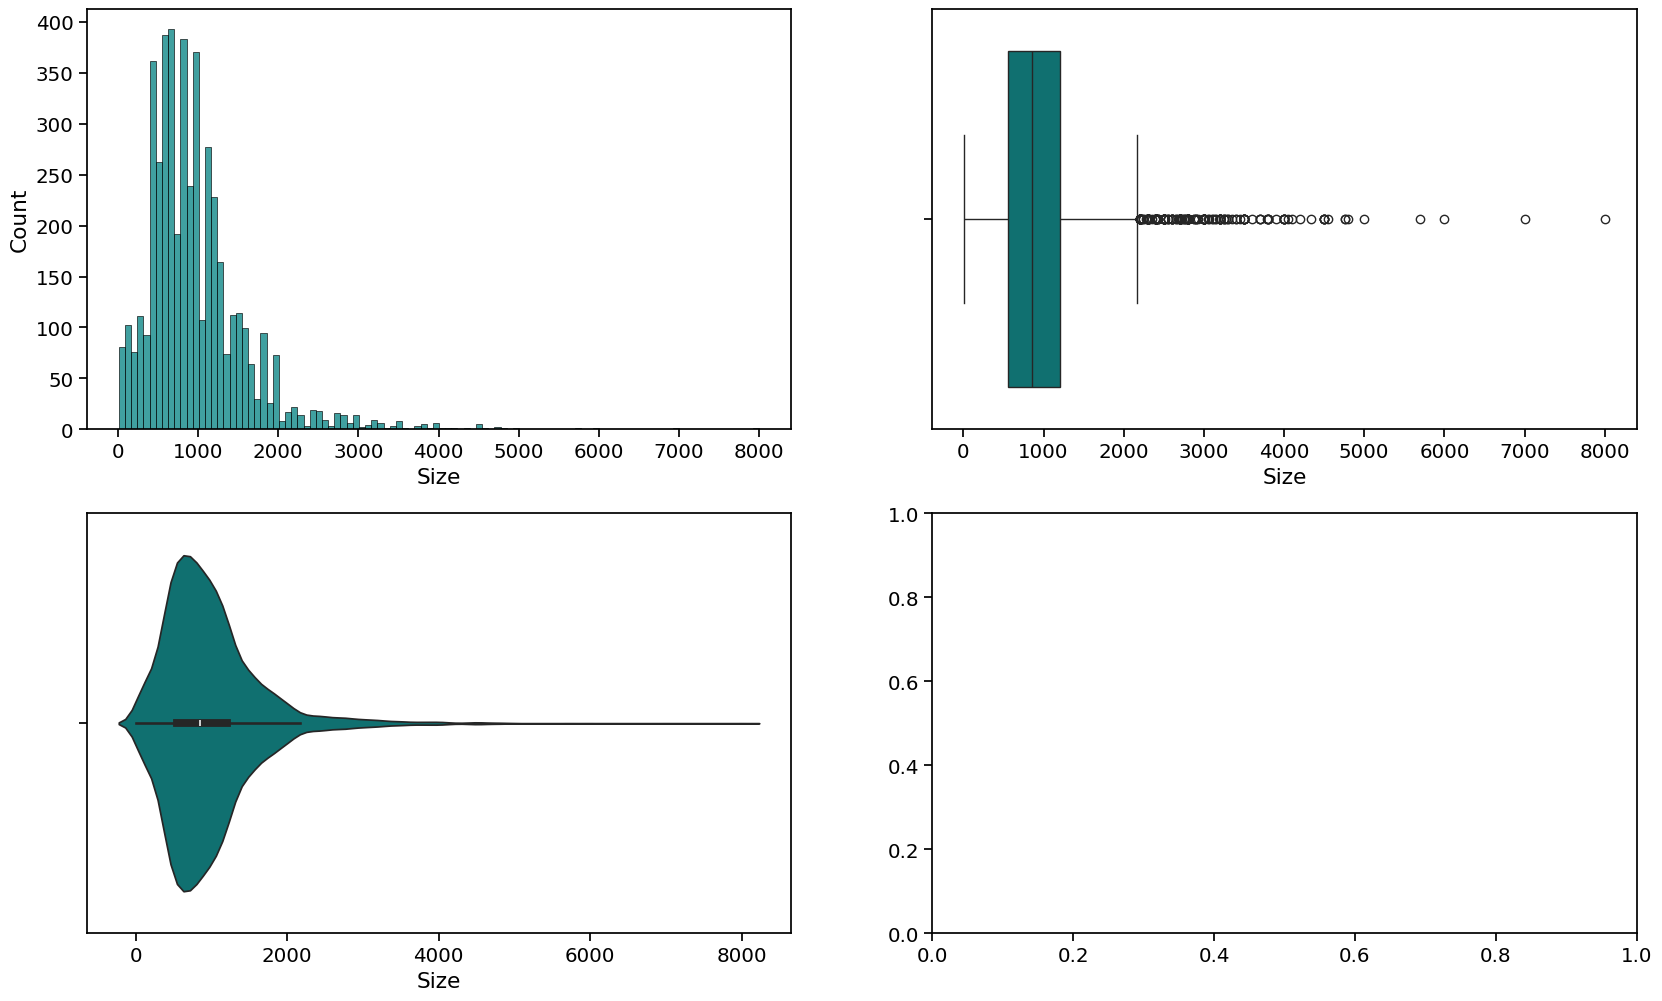

In [75]:
# Size

ig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = dataset['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = dataset['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = dataset['Size'], ax= ax[1, 0], color= 'teal')
plt.show()

<Figure size 1500x700 with 0 Axes>

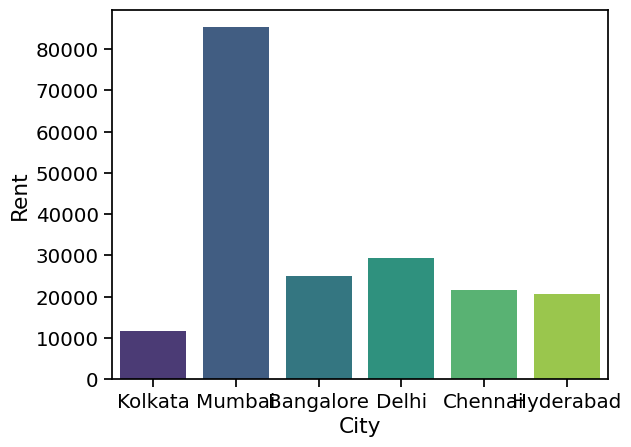

<Figure size 1500x700 with 0 Axes>

In [76]:
# City

ax = sns.barplot(x=dataset['City'], 
                 y=dataset['Rent'], 
                 palette='viridis',
                 hue=dataset['City'],
                 legend=False,
                 errorbar = None)
plt.ylabel('Rent')
plt.figure(figsize=(15, 7))

# for p in ax.patches:
#     ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

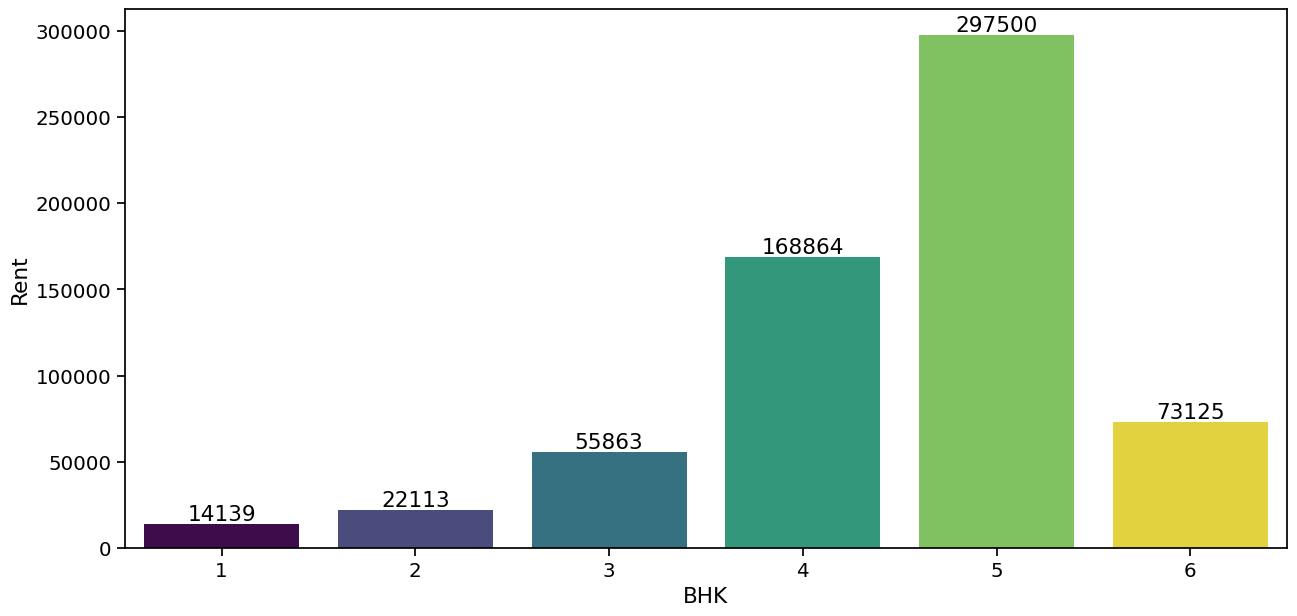

In [77]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=dataset['BHK'].sort_values(ascending=True), 
                 y=dataset['Rent'], 
                 palette='viridis',
                 hue=dataset['BHK'],
                 legend=False,
                 errorbar=None)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

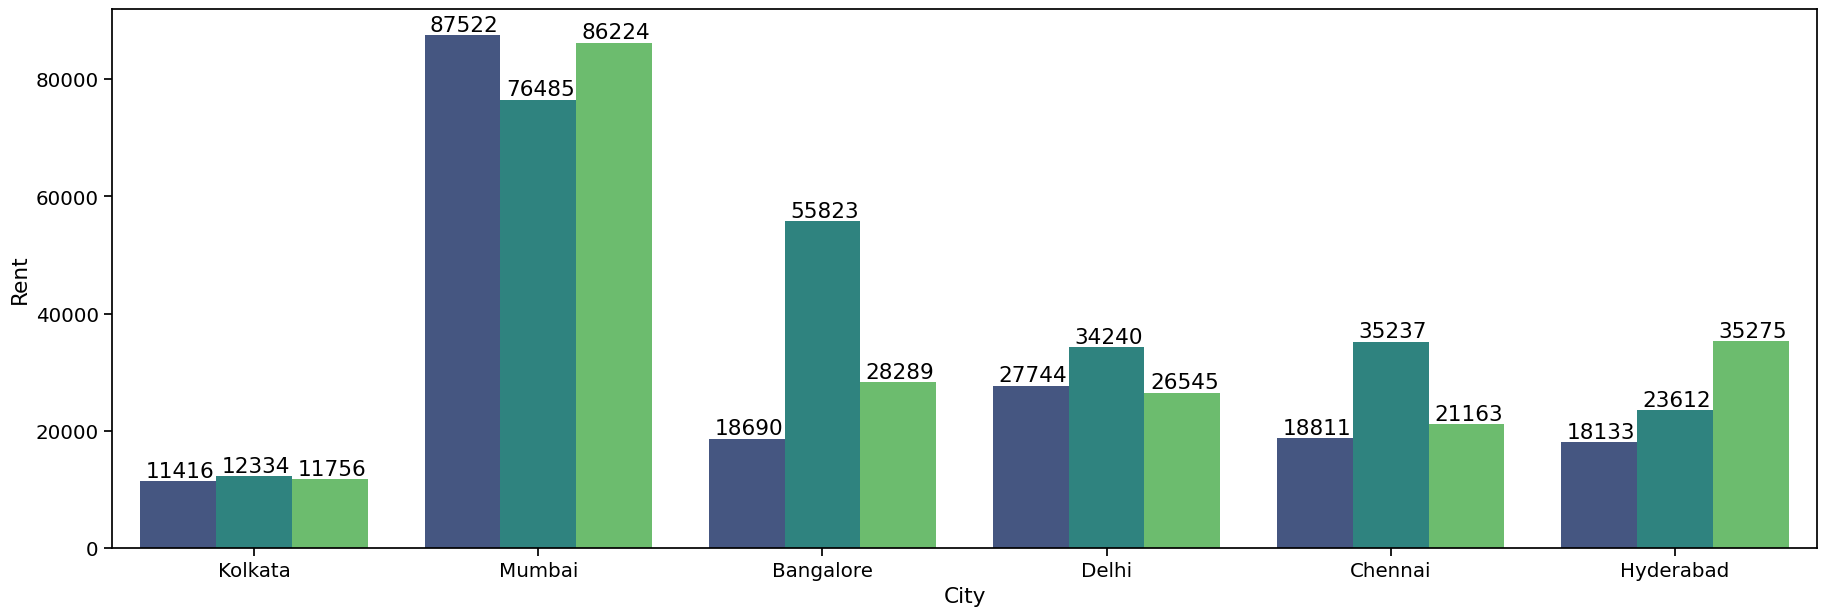

In [78]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=dataset['City'], 
                 y=dataset['Rent'],
                 hue = dataset['Tenant Preferred'], 
                 palette='viridis',
                 legend = False,
                 errorbar = None)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

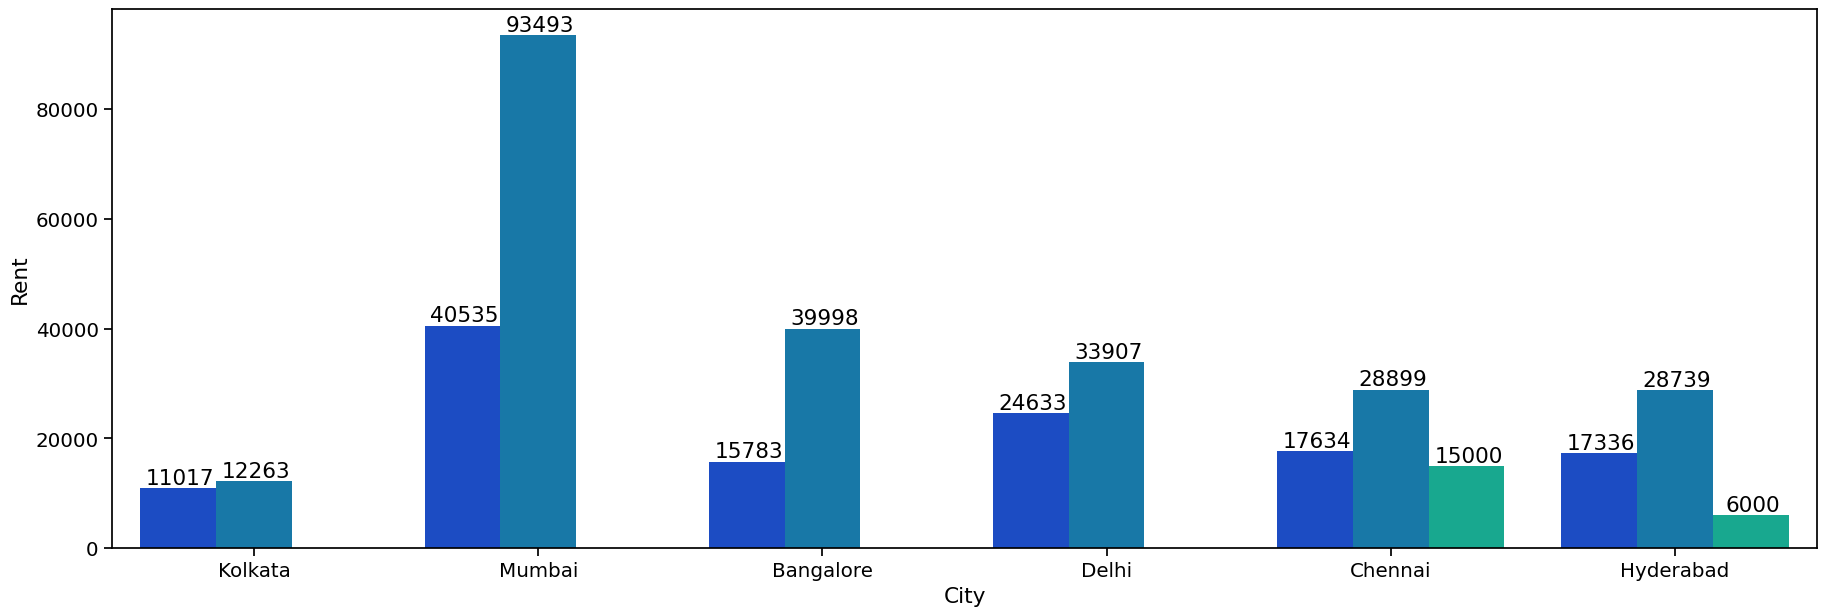

In [79]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=dataset['City'], 
                 y=dataset['Rent'],
                 hue = dataset['Area Type'], 
                 palette='winter',
                 legend=False,
                 errorbar=None)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

## Pré Processamento

In [80]:
# Based on this analysis we can confirm there's some columns that are not interesting for our algorithm (explain why?)
# Such as: Posted On, Floor, Area Locality, City, Tenant Preferred e Point of Contact

# We can remove those columns for prevent our dataset to have many...

dataset = dataset.drop(['Posted On', 'Floor', 'Area Locality', 'City', 'Tenant Preferred', 'Point of Contact'], axis=1)
dataset.head()

,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Unfurnished,2
1,2,20000,800,Super Area,Semi-Furnished,1
2,2,17000,1000,Super Area,Semi-Furnished,1
3,2,10000,800,Super Area,Unfurnished,1
4,2,7500,850,Carpet Area,Unfurnished,1


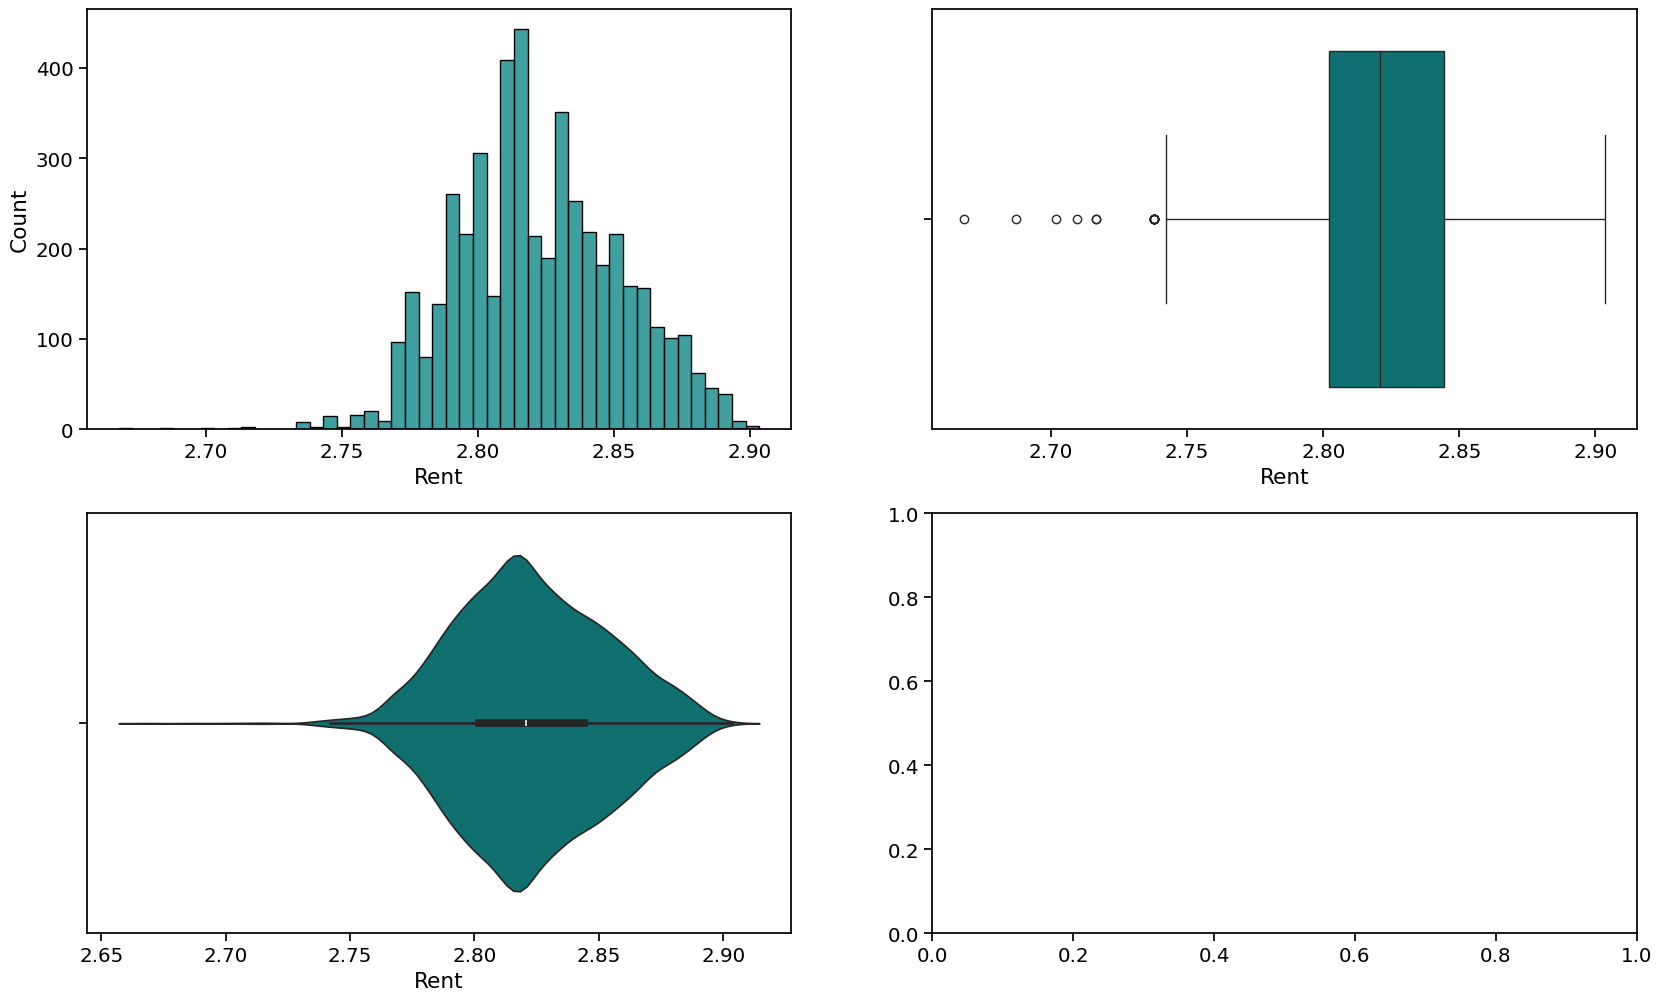

In [81]:
"""
Percebemos que essa coluna tem outliers que precisam ser trabalhados.
Além disso, a distribuição dos dados não está tão agradável para regressão, como a obliquidade e curtose.
Muita variância pode tornar mais difícil de encontrar padrões nos dados.

Primeiro vamos remover os outliers
"""

"""
Para isso vamos utilizar a Box Cox
A Box Cox é uma técnica de normalização para normalizar variáveis 
idependentes que não são normalmente  distribuídas. 
"""

# Remoção dos outliers
max_rent = dataset['Rent'].max()
index_max_rent = dataset[dataset['Rent'] == max_rent].index
dataset = dataset.drop(index_max_rent)

# Box Cox
dataset['Rent'] = boxcox(dataset['Rent'])[0]

# Resultados da aplicação das técnicas
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = dataset['Rent'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = dataset['Rent'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = dataset['Rent'], ax= ax[1, 0], color= 'teal')

plt.show()

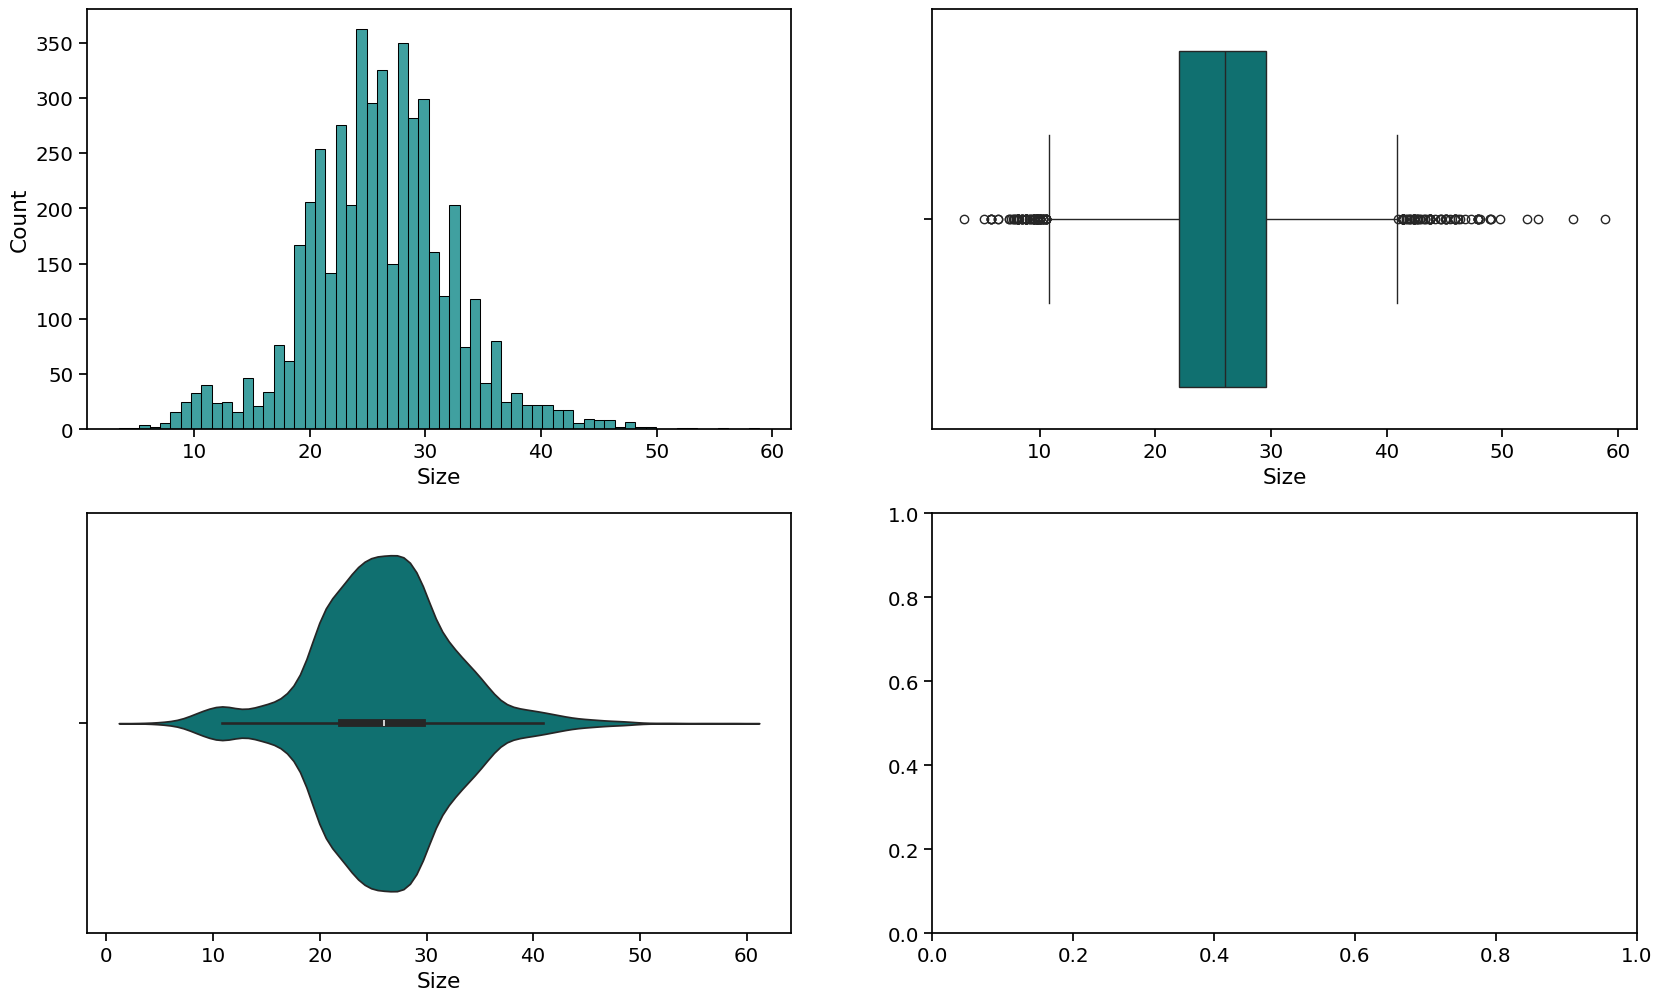

In [82]:
dataset['Size'] = boxcox(dataset['Size'])[0]

# Resultados
ig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = dataset['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = dataset['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = dataset['Size'], ax= ax[1, 0], color= 'teal')
plt.show()